<b>Q1. Install and load the latest versions of TensorFlow and Keras. Print their versions.

In [1]:
import tensorflow as tf
from tensorflow import keras
tf.__version__

'2.13.0'

<b>Q2. Load the Wine Quality dataset and explore its dimensions.

In [2]:
import pandas as pd
df = pd.read_csv("wine.csv")

<b>Q3. Check for null values, identify categorical variables, and encode them.

In [3]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Dataset has no null values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [5]:
df['quality'].value_counts()

quality
good    855
bad     744
Name: count, dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder
Encoder = LabelEncoder()


In [7]:
df['quality'] = Encoder.fit_transform(df['quality'])

In [8]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


<b>Q4. Separate the features and target variables from the dataframe.

In [9]:
X = df.drop(['quality'],axis = 1)
y = df['quality']

<b>Q5. Perform a train-test split and divide the data into training, validation, and test datasets.

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2 , random_state = 42 )

In [11]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [12]:
cv = KFold(n_splits = 5,shuffle = True,random_state = 42)

In [13]:
cross_val_score(LogisticRegression(),X_train,y_train,cv = cv)

array([0.78515625, 0.7734375 , 0.7265625 , 0.7421875 , 0.69411765])

<b>Q6. Perform scaling on the dataset.

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

<b>Q7. Create at least 2 hidden layers and an output layer for the binary categorical variables.
    
<b>Q8. Create a Sequential model and add all the layers to it.

In [15]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [16]:
model = Sequential()
model.add(Dense(11,activation = 'relu',input_dim = 11))
model.add(Dense(11,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

<b>Q9. Implement a TensorBoard callback to visualize and monitor the model's training process.

In [17]:
import time
import os
def get_log_path(log_dir = "log/fit"):
    filename = time.strftime("log_&y_&m_&d_$H_&M_&S")
    log_path = os.path.join(log_dir,filename)
    print(f"saving log at {log_path}")
    return log_path
log_dir = get_log_path()
tb_cb = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

saving log at log/fit\log_&y_&m_&d_$H_&M_&S


<b>Q10. Use Early Stopping to prevent overfitting by monitoring a chosen metric and stopping the training if
no improvement is observed.

In [18]:
early_stoping_cb = tf.keras.callbacks.EarlyStopping(patience=0, restore_best_weights=True)

<b>Q11. Implement a ModelCheckpoint callback to save the best model based on a chosen metric during
training.

In [19]:
ckpt_path = 'model_ckpt.h5'
checkpointing_cb = tf.keras.callbacks.ModelCheckpoint(ckpt_path,save_best_only = True)

<b>Q12. Print the model summary.

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<b>Q13. Use binary cross-entropy as the loss function, Adam optimizer, and include the metric ['accuracy'].

<b>Q14. Compile the model with the specified loss function, optimizer, and metrics.

In [21]:
model.compile(loss = 'binary_crossentropy',optimizer = 'Adam',metrics = ['accuracy'])

<b>Q15. Fit the model to the data, incorporating the TensorBoard, Early Stopping, and ModelCheckpoint
callbacks.

In [22]:
history = model.fit(X_train_scl,y_train,epochs =50,validation_split = 0.2,callbacks = [tb_cb,early_stoping_cb,checkpointing_cb])

Epoch 1/50
32/32 [==============================] - 2s 17ms/step - loss: 0.7525 - accuracy: 0.4692 - val_loss: 0.7024 - val_accuracy: 0.5312
Epoch 2/50
32/32 [==============================] - 0s 8ms/step - loss: 0.6841 - accuracy: 0.5513 - val_loss: 0.6545 - val_accuracy: 0.6484
Epoch 3/50
32/32 [==============================] - 0s 8ms/step - loss: 0.6565 - accuracy: 0.6285 - val_loss: 0.6267 - val_accuracy: 0.7031
Epoch 4/50
32/32 [==============================] - 0s 8ms/step - loss: 0.6388 - accuracy: 0.6559 - val_loss: 0.6025 - val_accuracy: 0.7305
Epoch 5/50
32/32 [==============================] - 0s 8ms/step - loss: 0.6237 - accuracy: 0.6676 - val_loss: 0.5778 - val_accuracy: 0.7383
Epoch 6/50
32/32 [==============================] - 0s 8ms/step - loss: 0.6098 - accuracy: 0.6725 - val_loss: 0.5548 - val_accuracy: 0.7344
Epoch 7/50
32/32 [==============================] - 0s 8ms/step - loss: 0.5970 - accuracy: 0.6784 - val_loss: 0.5319 - val_accuracy: 0.7656
Epoch 8/50
32/32 [=

<b>Q16 Get the model's parameters.

In [23]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 32}

<b>Q17. Store the model's training history as a Pandas DataFrame.

In [24]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.752507,0.469208,0.702402,0.531250
1,0.684136,0.551320,0.654545,0.648438
2,0.656464,0.628543,0.626719,0.703125
3,0.638796,0.655914,0.602532,0.730469
4,0.623670,0.667644,0.577768,0.738281
5,0.609775,0.672532,0.554812,0.734375
6,0.597035,0.678397,0.531853,0.765625
7,0.585244,0.688172,0.513652,0.773438
8,0.575041,0.695992,0.497374,0.808594
9,0.568159,0.709677,0.483674,0.808594


<b>Q18. Plot the model's training history.

<Axes: >

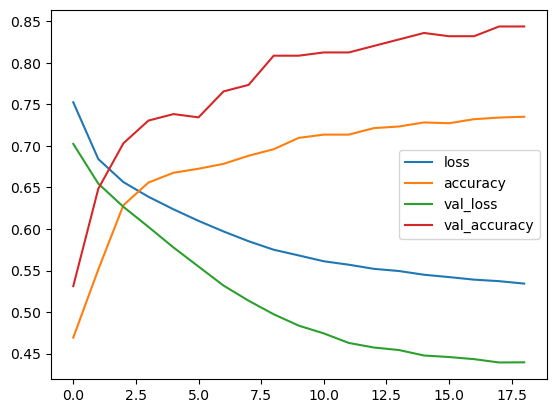

In [25]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot()

<b>Q19. Evaluate the model's performance using the test data.

In [26]:
model.evaluate(X_test_scl,y_test)

10/10 [==============================] - 0s 4ms/step - loss: 0.5262 - accuracy: 0.7344


[0.5262293815612793, 0.734375]